### Shop Customer Data

## About Data

Data Didapatkan pada web Kaggle "Shop Customer Data"
https://www.kaggle.com/datasets/datascientistanna/customers-dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import LabelEncoder

In [2]:
DF_CUSTOMER = pd.read_csv('/content/drive/MyDrive/Belajar Data Analisis/Customers.csv')
DF_CUSTOMER.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


## CLEANING DATA

In [3]:
DF_CUSTOMER.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [4]:
DF_CUSTOMER.keys()

Index(['CustomerID', 'Gender', 'Age', 'Annual Income ($)',
       'Spending Score (1-100)', 'Profession', 'Work Experience',
       'Family Size'],
      dtype='object')

In [5]:
col = list()
for key in DF_CUSTOMER.keys():
  for rep in ['(',')', '$', '-', '1100']:
      key = (key.replace(rep,''))
  key = key.strip().replace(' ','_')
  col.append(key)

DF_CUSTOMER.columns = col
DF_CUSTOMER.keys()

Index(['CustomerID', 'Gender', 'Age', 'Annual_Income', 'Spending_Score',
       'Profession', 'Work_Experience', 'Family_Size'],
      dtype='object')

In [6]:
DF_CUSTOMER.shape

(2000, 8)

In [7]:
DF_CUSTOMER.loc[DF_CUSTOMER['Profession'].isnull()]

,CustomerID,Gender,Age,Annual_Income,Spending_Score,Profession,Work_Experience,Family_Size
79,80,Female,49,98000,42,NaN,1,1
118,119,Female,51,84000,43,NaN,2,7
219,220,Female,59,76000,61,NaN,9,1
237,238,Male,95,36000,35,NaN,0,4
437,438,Male,76,136259,14,NaN,0,7
440,441,Female,0,57373,29,NaN,0,7
498,499,Male,95,121725,3,NaN,12,3
545,546,Female,89,107359,26,NaN,10,6
601,602,Male,61,126370,20,NaN,11,4
641,642,Male,66,121377,19,NaN,7,7


In [9]:
DF_CUSTOMER.describe().astype(int)

,CustomerID,Age,Annual_Income,Spending_Score,Work_Experience,Family_Size
count,2000,2000,2000,2000,2000,2000
mean,1000,48,110731,50,4,3
std,577,28,45739,27,3,1
min,1,0,0,0,0,1
25%,500,25,74572,28,1,2
50%,1000,48,110045,50,3,4
75%,1500,73,149092,75,7,5
max,2000,99,189974,100,17,9


In [10]:
DF_CUSTOMER.Profession.value_counts()

Artist           612
Healthcare       339
Entertainment    234
Engineer         179
Doctor           161
Executive        153
Lawyer           142
Marketing         85
Homemaker         60
Name: Profession, dtype: int64

## Analisis

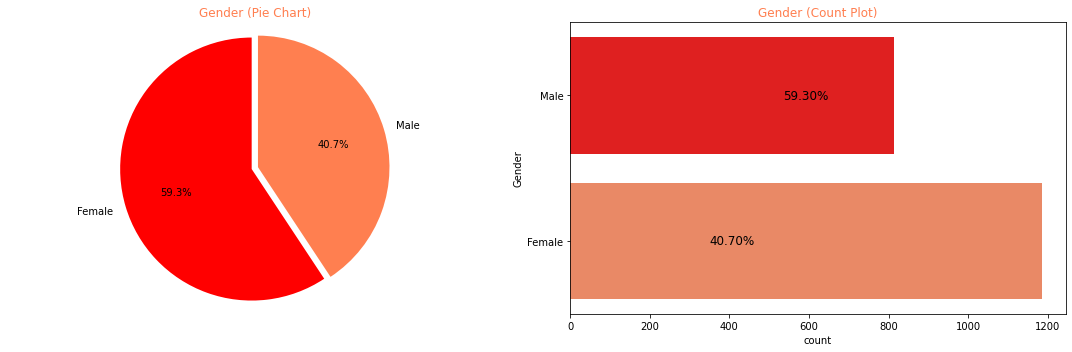

In [11]:
plt.figure(figsize=(15,5))

DATA_Pie_Data = DF_CUSTOMER.groupby('Gender')
Pie_Label = sorted([i for i in DF_CUSTOMER.loc[:, 'Gender'].unique()])

# Plot 1 - Pie Chart
plt.subplot(121) 
plt.pie(DATA_Pie_Data['Gender'].count(), labels= Pie_Label, explode= (0, 0.1), startangle= 90,
        autopct = '%1.1f%%', radius = 2, colors=['red', 'coral'])
plt.title('Gender (Pie Chart)', color='coral')
plt.axis('equal')

# Plot 2 - Count Plot
plt.subplot(122) 
ax = sns.countplot(y=DF_CUSTOMER["Gender"], palette=['red', 'coral'])
for i,v in enumerate(DF_CUSTOMER['Gender'].value_counts()):
    ax.text(v/2, i, '{:.2f}%'.format((v/len(DF_CUSTOMER['Gender']))*100), ha="center", va="center", fontsize=12, color='black')
plt.title('Gender (Count Plot)', color='coral')

plt.tight_layout()
plt.show()

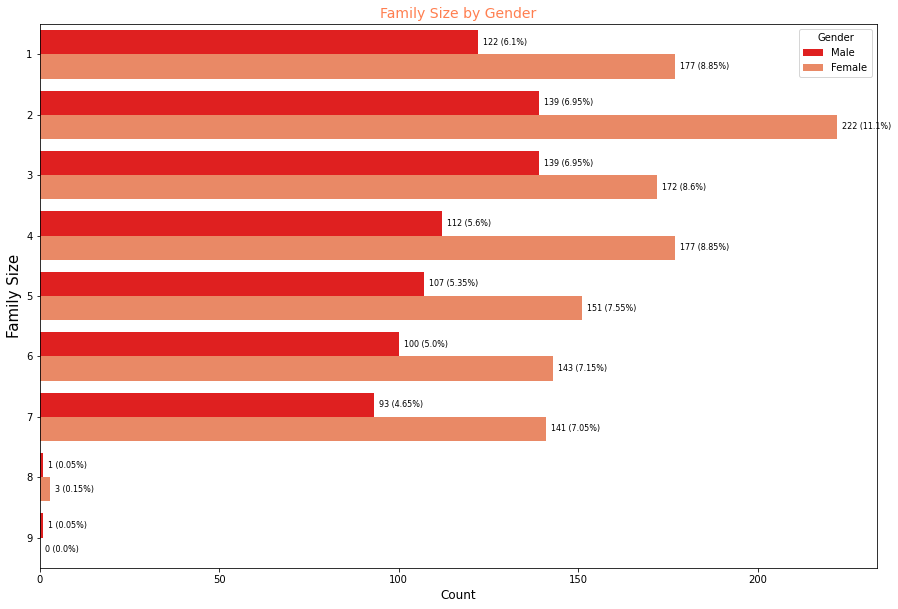

In [20]:
plt.figure(figsize=(15,10))
bar4 = sns.countplot(y=DF_CUSTOMER['Family_Size'], hue=DF_CUSTOMER['Gender'], palette=['red', 'coral'])
plt.title('Family Size by Gender', color='coral', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Family Size', fontsize=15)

# Menggunakan loop for untuk menambahkan nilai pada setiap bar plot
for n, patch in enumerate(bar4.patches):
    porc = f'{round((patch.get_width()/sum(DF_CUSTOMER["Family_Size"].value_counts().values))*100, 2)}%'
    bar4.annotate(f'  {int(patch.get_width())} ({porc})',
                 xy=(patch.get_width(), patch.get_y()+patch.get_height()/2),
                 ha='left', va='center', fontsize=8)
    
plt.show()


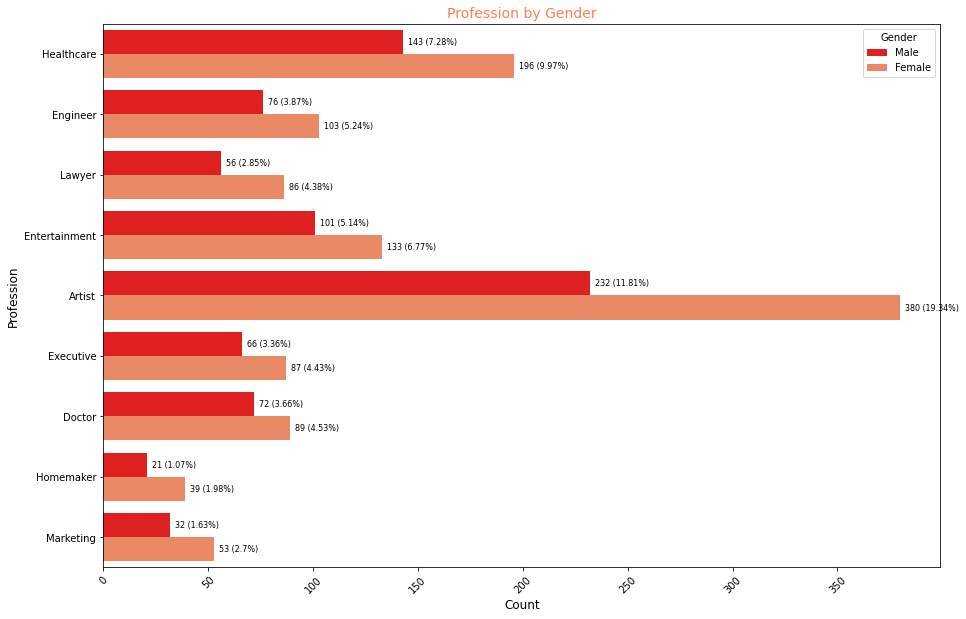

In [21]:
plt.figure(figsize=(15,10))
bar = sns.countplot(y=DF_CUSTOMER['Profession'], hue=DF_CUSTOMER['Gender'], palette=['red', 'coral'])
plt.title('Profession by Gender', color='coral', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Profession', fontsize=12)
plt.xticks(rotation=45)

# Menggunakan loop for untuk menambahkan nilai pada setiap bar plot
for n, patch in enumerate(bar.patches):
    porc = f'{round((patch.get_width()/sum(DF_CUSTOMER["Profession"].value_counts().values))*100, 2)}%'
    bar.annotate(f'  {int(patch.get_width())} ({porc})',
                 xy=(patch.get_width(), patch.get_y()+patch.get_height()/2),
                 ha='left', va='center', fontsize=8)
    
plt.show()


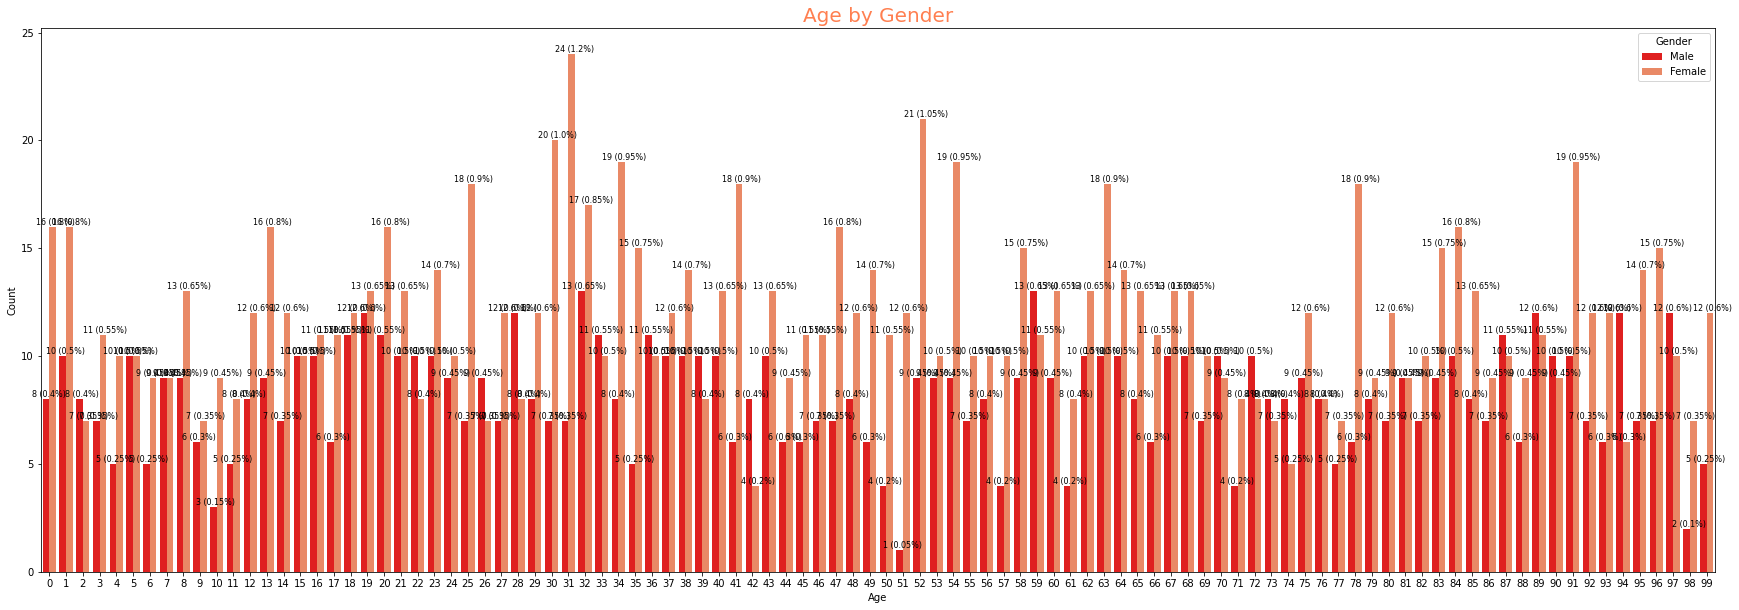

In [16]:
plt.figure(figsize=(30,10))
bar2 = sns.countplot(x=DF_CUSTOMER['Age'], hue=DF_CUSTOMER['Gender'], palette=['red', 'coral'])
plt.title('Age by Gender', color='coral', fontsize=20)
plt.xlabel('Age')
plt.ylabel('Count')

for n, patch in enumerate(bar2.patches):
    porc = f'{round((patch.get_height()/sum(DF_CUSTOMER["Age"].value_counts().values))*100, 2)}%'
    bar2.annotate(f'  {int(patch.get_height())} ({porc})',
                 xy=(patch.get_x()+patch.get_width()/2, patch.get_height()),
                 ha='center', va='bottom', fontsize=8)
plt.show()

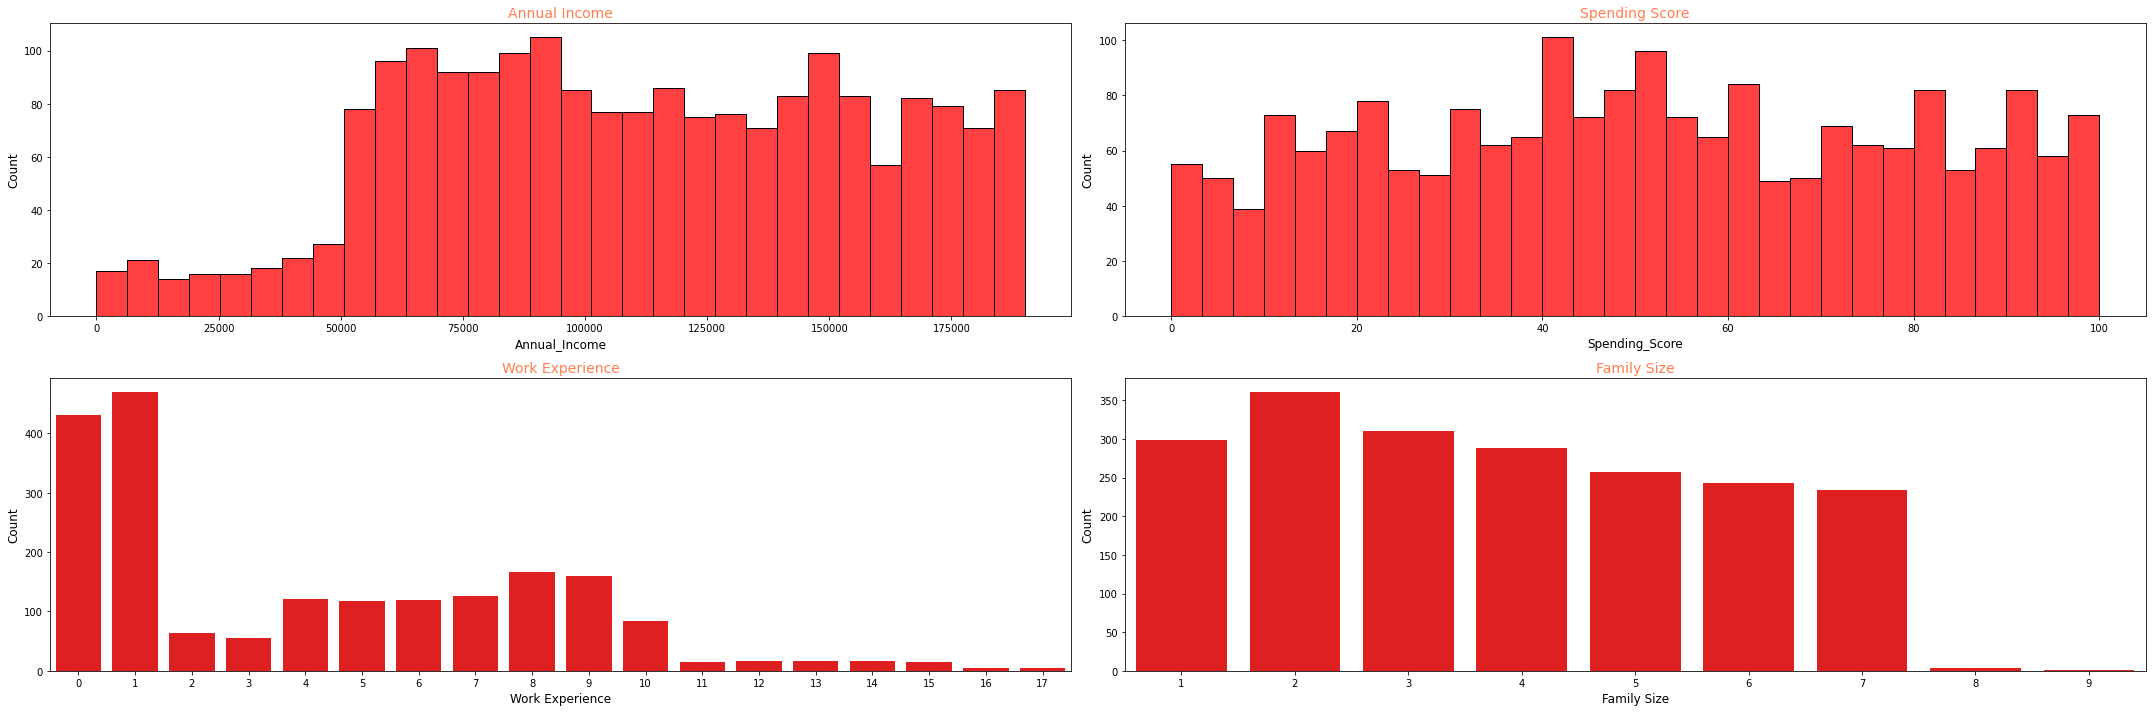

In [14]:
plt.figure(figsize=(30,10))
plt.subplot(221) 
sns.histplot(x=DF_CUSTOMER['Annual_Income'], bins=30, color='red')
plt.title('Annual Income', color='coral', fontsize=14)
plt.xlabel('Annual_Income', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.subplot(222) 
sns.histplot(x=DF_CUSTOMER['Spending_Score'], bins=30, color='red')
plt.title('Spending Score', color='coral', fontsize=14)
plt.xlabel('Spending_Score', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.subplot(223) 
sns.countplot(x=DF_CUSTOMER['Work_Experience'], color='red')
plt.title('Work Experience', color='coral', fontsize=14)
plt.xlabel('Work Experience', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.subplot(224) 
sns.countplot(x=DF_CUSTOMER['Family_Size'], color='red')
plt.title('Family Size', color='coral', fontsize=14)
plt.xlabel('Family Size', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.tight_layout()
plt.show()